# The Fundamentals of Autograd

## Simple Example

In [1]:
# %matplotlib inline

import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

In [2]:
a = torch.linspace(0., 2. * math.pi, steps = 25, requires_grad = True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


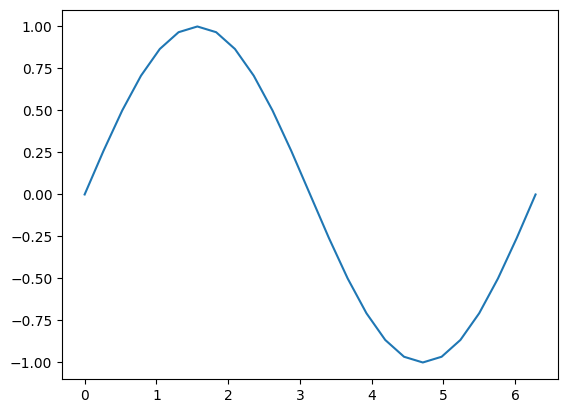

In [3]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

In [4]:
print(b)

tensor([ 0.0000e+00,  2.5882e-01,  5.0000e-01,  7.0711e-01,  8.6603e-01,
         9.6593e-01,  1.0000e+00,  9.6593e-01,  8.6603e-01,  7.0711e-01,
         5.0000e-01,  2.5882e-01, -8.7423e-08, -2.5882e-01, -5.0000e-01,
        -7.0711e-01, -8.6603e-01, -9.6593e-01, -1.0000e+00, -9.6593e-01,
        -8.6603e-01, -7.0711e-01, -5.0000e-01, -2.5882e-01,  1.7485e-07],
       grad_fn=<SinBackward0>)


In [5]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -4.7684e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


In [6]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


In [27]:
print('d :')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc :')
print(c.grad_fn)
print('\nb :')
print(b.grad_fn)
print('\na :')
print(a.grad_fn)

d :
((<MulBackward0 object at 0x7fad42078ca0>, 0), (None, 0))
((<SinBackward0 object at 0x7fad41727dc0>, 0), (None, 0))
((<AccumulateGrad object at 0x7fad42078fa0>, 0),)
()

c :

b :

a :


tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


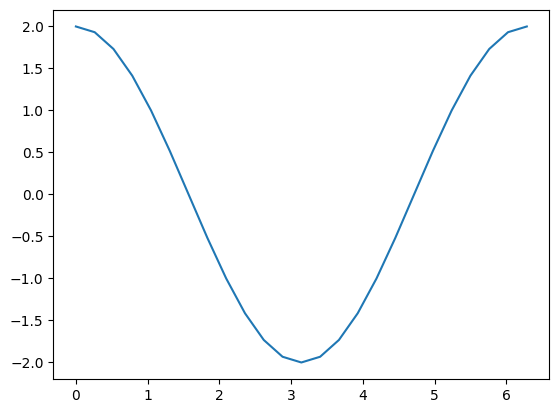

In [8]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

In [9]:
a = torch.linspace(0., 2. * math.pi, steps = 25, requires_grad = True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

## Autograd in Training

In [10]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad = False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad = False)

model = TinyModel()

In [11]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([-0.0586, -0.0797, -0.0088, -0.0942,  0.0739,  0.0876, -0.0140,  0.0871,
         0.0967, -0.0027], grad_fn=<SliceBackward0>)
None


In [12]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(151.7655, grad_fn=<SumBackward0>)


In [13]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0586, -0.0797, -0.0088, -0.0942,  0.0739,  0.0876, -0.0140,  0.0871,
         0.0967, -0.0027], grad_fn=<SliceBackward0>)
tensor([ 1.3523e+00, -1.6681e+00,  8.7824e-01, -5.0596e+00, -4.7315e+00,
         1.4207e+00,  7.5741e-01,  3.1632e+00,  1.8155e-03, -7.6745e-01])


In [14]:
optimizer.step()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0599, -0.0780, -0.0097, -0.0892,  0.0787,  0.0862, -0.0147,  0.0839,
         0.0967, -0.0019], grad_fn=<SliceBackward0>)
tensor([ 1.3523e+00, -1.6681e+00,  8.7824e-01, -5.0596e+00, -4.7315e+00,
         1.4207e+00,  7.5741e-01,  3.1632e+00,  1.8155e-03, -7.6745e-01])


In [15]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad(set_to_none = False)

print(model.layer2.weight.grad[0][0:10])

tensor([ 1.3523e+00, -1.6681e+00,  8.7824e-01, -5.0596e+00, -4.7315e+00,
         1.4207e+00,  7.5741e-01,  3.1632e+00,  1.8155e-03, -7.6745e-01])
tensor([ 12.5244,  -5.2544,   8.2989, -11.5437, -28.0098,   8.8085,   6.0962,
         17.9607,  -2.8453,  -4.7745])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## Turning Autograd Off and On

In [16]:
a = torch.ones(2, 3, requires_grad = True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


In [17]:
a = torch.ones(2, 3, requires_grad = True) * 2
b = torch.ones(2, 3, requires_grad = True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


In [18]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad = True) * 2
b = torch.ones(2, 3, requires_grad = True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [19]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.2091, 0.8876, 0.8626, 0.4435, 0.8512], requires_grad=True)
tensor([0.2091, 0.8876, 0.8626, 0.4435, 0.8512])


## Autograd Profiler

In [21]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda')
    run_on_gpu = True

x = torch.randn(2, 3, requires_grad =True)
y = torch.rand(2, 3, requires_grad = True)
z = torch.ones(2, 3, requires_grad = True)

with torch.autograd.profiler.profile(use_cuda = run_on_gpu) as prf:
    for _ in range(1000):
        z = (z / x) * y

print(prf.key_averages().table(sort_by = 'self_cpu_time_total'))

-------------  ------------  ------------  ------------  ------------  ------------  ------------  
         Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
    aten::div        51.79%       2.531ms        51.79%       2.531ms       2.531us          1000  
    aten::mul        48.21%       2.356ms        48.21%       2.356ms       2.356us          1000  
-------------  ------------  ------------  ------------  ------------  ------------  ------------  
Self CPU time total: 4.887ms



STAGE:2023-12-22 16:47:26 94277:1448599 ActivityProfilerController.cpp:312] Completed Stage: Warm Up
STAGE:2023-12-22 16:47:26 94277:1448599 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2023-12-22 16:47:26 94277:1448599 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


## Advanced Topic: More Autograd Detail and the High-Level API

In [22]:
x = torch.randn(3, requires_grad = True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([1140.4928, -288.3859,  691.9594], grad_fn=<MulBackward0>)


In [23]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype = torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


## The High-Level API

In [24]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.5355]), tensor([0.0502]))


(tensor([[3.4168]]), tensor([[3.]]))

In [25]:
inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.5287, 0.0027, 0.2596]), tensor([0.9002, 0.4856, 0.4258]))


(tensor([[3.3934, 0.0000, 0.0000],
         [0.0000, 2.0054, 0.0000],
         [0.0000, 0.0000, 2.5928]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

In [26]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v = my_gradients)

(tensor([ -800.3328, -1118.0887,  -119.3790]),
 tensor([5.1200e+01, 5.1200e+02, 5.1200e-02]))